In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataframe Creation

In [2]:
pd.set_option('display.max_rows', None)

file_path = r'C:\Users\rafael.s.fagundes\Downloads\AEVDT_6129___VMOS_Dashboard_Test.csv'
df = pd.read_csv(file_path)

df.rename(columns={'dim_application_id__application_key':'appid','client_key_count':'users_count'},inplace=True)

In [3]:
df.head()

,year,month,dim_market_id__market_name,dim_device_category_id__device_category_name,dim_page_id__page_name,appid,dim_event_id__event_name,dim_event_action_id__event_action_name,dim_event_category_id__event_category_name,users_count,global__filter__header_and_footer_events_count,filter__non_interaction_events_count,interacting_users_count,users_model_overview_count,engagers_model_overview_count
0,2024,1,Slovakia,Desktop,product_list.cars,marketplace_emh_vehicles_entry,View Item List,unknown,unknown,10277,0,0,0,0,0
1,2024,6,Germany,Mobile,models,vmos,Filter,custom_sub_group,Filter,25993,0,0,25993,25993,0
2,2024,4,Poland,Desktop,product_list.cars,marketplace_emh_vehicles_mid,Page View,unknown,unknown,139115,0,0,0,0,0
3,2024,11,South Africa,Desktop,models.finance,aem,Page View,unknown,unknown,9201,0,0,0,0,0
4,2023,12,Poland,Mobile,buy.showroom,voc,unknown,model_gallery,Link,12169,0,0,0,0,0


In [4]:
top_num = 10
selected_year = 2024

# Agrupa os dados por categoria e soma o número total de usuários
df_grouped = df.groupby(by=['appid'])['users_count'].sum().reset_index()

# Ordena as categorias pelo total de usuários em ordem decrescente
df_grouped = df_grouped.sort_values(by='users_count', ascending=False).reset_index()

# Seleciona as 10 categorias com mais usuários
df_top = df_grouped.head(top_num)

# Cria uma lista com as categorias mais populares
top_categories = df_top['appid'].tolist()

# Filtra os dados para o ano de 2024 e mantém apenas as categorias do top 10
df_filtered = df[(df['year'] == selected_year) & (df['appid'].isin(top_categories))]

# Agrupa os dados por ano, mês e categoria, somando o total de usuários
df_final = df_filtered.groupby(by=['year','month','appid'])['users_count'].sum().reset_index()

# Cria um ranking dentro de cada mês e ano, onde a maior contagem de usuários recebe o primeiro lugar
df_final['rank'] = df_final.groupby(['year', 'month'])['users_count'].rank(method="dense", ascending=False)

In [5]:
df_final.head()

,year,month,appid,users_count,rank
0,2024,1,aem,49192870,2.0
1,2024,1,marketplace_emh_vehicles_high,11856156,5.0
2,2024,1,marketplace_emh_vehicles_mid,9960884,7.0
3,2024,1,marketplace_legacy_vehicles,3526502,10.0
4,2024,1,owcc,105450136,1.0


### Plot the Bump Charts

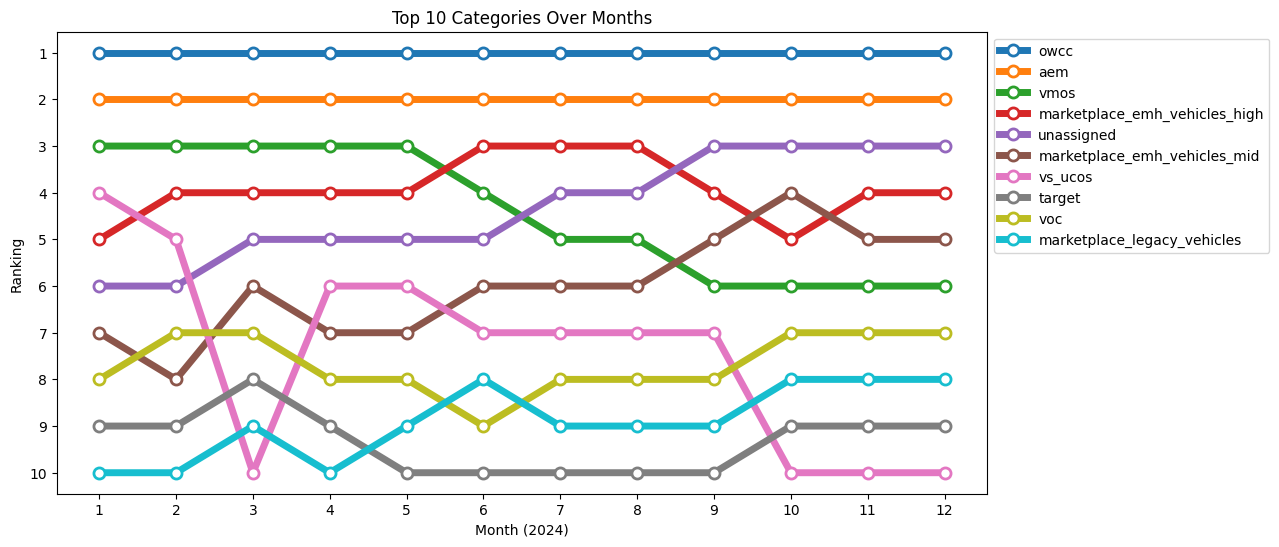

In [6]:
# Criar o gráfico de bump chart
plt.figure(figsize=(12, 6))

# Definir uma paleta de cores para os top categorias
colors = sns.color_palette("tab10", n_colors=len(top_categories))

# Criar as linhas do bump chart para cada aplicação no top_categories
for i, app in enumerate(top_categories):
    app_data = df_final[df_final["appid"] == app]  # Filtrar corretamente
    plt.plot(app_data["month"], app_data["rank"]
             , marker="o", markersize=8, markerfacecolor='white', markeredgecolor=colors[i], markeredgewidth=2
             ,label=app, color=colors[i], linewidth=5)  # Usar os dados filtrados

# Ajustar o eixo Y para refletir ranking (1 no topo)
plt.gca().invert_yaxis()

# Adicionar labels e título
plt.xticks(df_final["month"].unique())  # Garantir que apenas meses existentes sejam mostrados
plt.yticks(sorted(df_final["rank"].unique()))  # <- Garante que todos os valores do eixo Y sejam exibidos

plt.xlabel(f"Month ({selected_year})")
plt.ylabel("Ranking")
plt.title("Top 10 Categories Over Months")

# Mostrar a legenda
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()


In [7]:
# Criar bump chart
fig = px.line(df_final, x='month', y='rank', color='appid', markers=True)

# Inverter eixo Y para manter 1 no topo
fig.update_yaxes(autorange="reversed", tickmode="linear")

# Mostrar todos os meses no eixo X
fig.update_xaxes(type='appid', tickmode="linear")

# Aumentar a espessura das linhas
fig.update_traces(
    line=dict(width=10),  # Aumenta a espessura das linhas
    marker=dict(size=13, symbol="circle", opacity=1, color="white", line=dict(color=None, width=3))  # Personaliza marcadores
)

# Remover a cor de fundo
fig.update_layout(
    plot_bgcolor="white",  # Fundo do gráfico branco
    paper_bgcolor="white",  # Fundo externo branco
    width=1100, height=600  # Ajustar tamanho do gráfico
)

# Exibir o gráfico
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.xaxis
        Received value: 'appid'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['-', 'linear', 'log', 'date', 'category',
            'multicategory']